In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

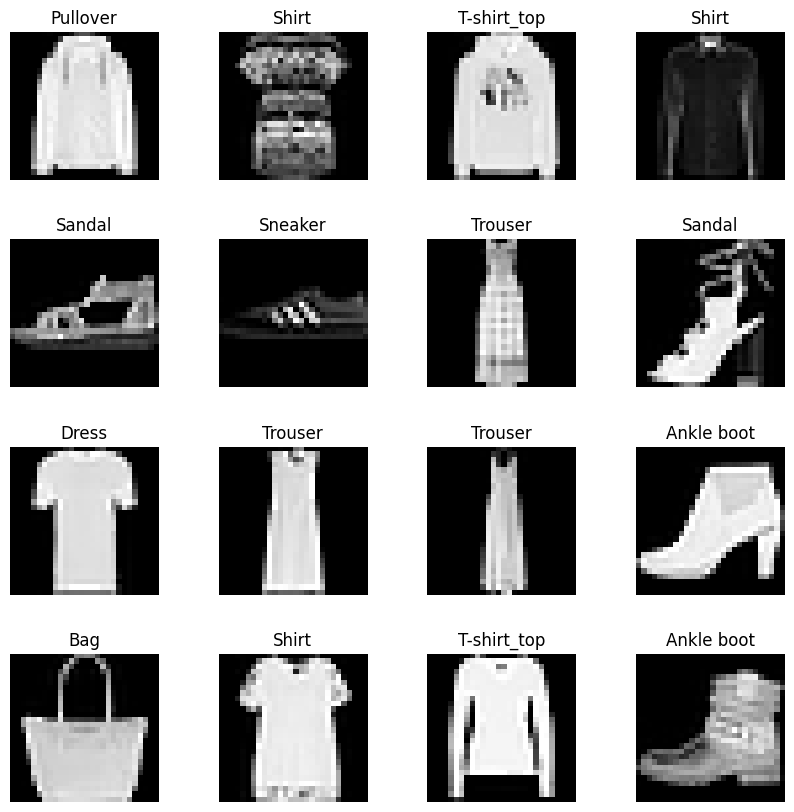

In [13]:
classes = ['Dress','Coat' ,'T-shirt_top','Trouser','Pullover','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

for _ , axis in enumerate(axes.flat):
    rand = np.random.randint(60000)
    axis.imshow(x_train[rand] , cmap = 'gray')
    axis.set_title(classes[y_train[rand]])
    axis.axis('off')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [5]:
model = keras.Sequential([
    keras.layers.Rescaling(1/255.0 , input_shape = ((28,28,1))),
    
    keras.layers.Conv2D(32, kernel_size=(3, 3) , padding = 'same' , activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3) , padding = 'same' , activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256 , activation = 'relu'),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(10, activation="softmax")]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [7]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [8]:
model.fit(x_train , y_train , batch_size = 128 , validation_split = 0.1 , epochs=10)

Epoch 1/10
422/422 [==============================] - 31s 71ms/step - loss: 0.3941 - accuracy: 0.8584 - val_loss: 0.6648 - val_accuracy: 0.7817
Epoch 2/10
422/422 [==============================] - 34s 80ms/step - loss: 0.2498 - accuracy: 0.9086 - val_loss: 0.2527 - val_accuracy: 0.9102
Epoch 3/10
422/422 [==============================] - 38s 90ms/step - loss: 0.2002 - accuracy: 0.9260 - val_loss: 0.2408 - val_accuracy: 0.9123
Epoch 4/10
422/422 [==============================] - 34s 82ms/step - loss: 0.1701 - accuracy: 0.9370 - val_loss: 0.2258 - val_accuracy: 0.9205
Epoch 5/10
422/422 [==============================] - 34s 80ms/step - loss: 0.1436 - accuracy: 0.9468 - val_loss: 0.2548 - val_accuracy: 0.9133
Epoch 6/10
422/422 [==============================] - 34s 80ms/step - loss: 0.1220 - accuracy: 0.9541 - val_loss: 0.2487 - val_accuracy: 0.9143
Epoch 7/10
422/422 [==============================] - 34s 81ms/step - loss: 0.0988 - accuracy: 0.9630 - val_loss: 0.2475 - val_accuracy:

In [11]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3919 - accuracy: 0.9022


[0.39189982414245605, 0.9021999835968018]

In [10]:
model.save('fashion_mnist.h5')